# `numpy` practice

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

## Exercise 6

In [15]:
a = np.zeros(10)
a[4] = 1
a

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

## Exercise 8

In [16]:
vect = np.arange(10)
vect = vect[::-1]
print(vect)

[9 8 7 6 5 4 3 2 1 0]


## Exercise 9

In [17]:
matrix = np.arange(9).reshape(3,3)
print(matrix)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


## Exercise 19

In [18]:
checkboard = np.zeros((8,8),dtype=int)
checkboard[1::2,::2] = 1
checkboard[::2,1::2] = 1
print(checkboard)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


## Exercise 44

In [19]:
coordinates = np.random.random((10,2))
axes_x,axes_y = coordinates[:,0], coordinates[:,1]
radius = np.sqrt(axes_x**2+axes_y**2)
angle = np.arctan2(axes_y,axes_x)
print(radius)
print(angle)

[0.95702796 0.62386464 1.00308059 1.23093164 0.52926829 0.94247732
 0.89202103 0.95030706 0.74591842 0.9416358 ]
[0.04605837 1.29003383 1.19331362 0.74297586 0.62839214 1.20892984
 0.73379464 0.55750541 0.09851867 0.25108776]


## Snail curve plotting

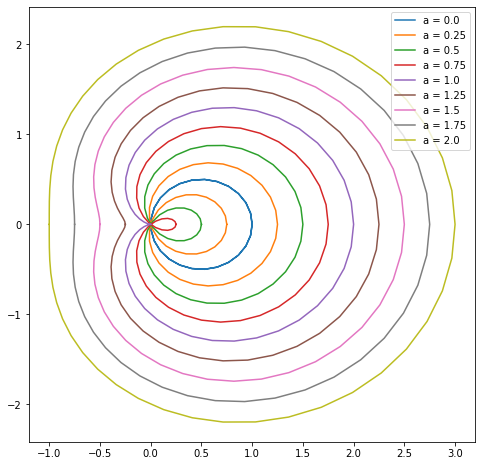

In [21]:
phi = np.linspace(-np.pi, np.pi, 51)
a = np.arange(0, 2 + .25, .25)
r = np.zeros((a.size, phi.size))
for i in range(r.shape[0]):
    r[i] = a[i] + np.cos(phi)

plt.subplots(figsize=(8, 8))
for i in range(r.shape[0]):
    x = r[i] * np.cos(phi)
    y = r[i] * np.sin(phi)
    plt.plot(x, y, label='a = ' + str(a[i]))
plt.legend()
plt.show()

## Cochleoid curve

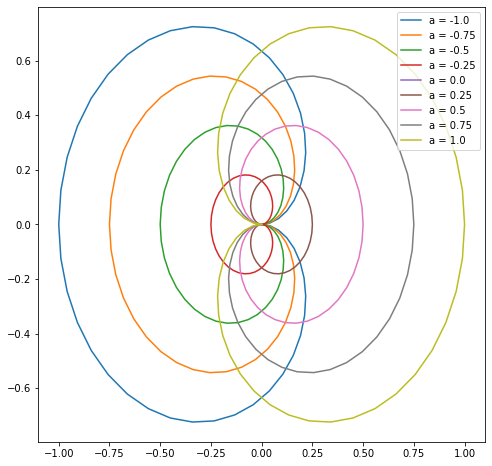

In [22]:
phi = np.linspace(-np.pi, np.pi, 51)
phi = phi[np.where(phi != 0)]
a = np.arange(-1, 1 + .25, .25)
r = np.zeros((a.size, phi.size))
for i in range(r.shape[0]):
    r[i] = a[i] * np.sin(phi) / phi
    
plt.subplots(figsize=(8, 8))
for i in range(r.shape[0]):
    x = r[i] * np.cos(phi)
    y = r[i] * np.sin(phi)
    plt.plot(x, y, label='a = ' + str(a[i]))
plt.legend()
plt.show()

## Cauchey matrix

In [23]:
np.set_printoptions(precision=3)
u = np.arange(4)
#___1___
v = u + 0.5
C = 1 / (u[:, None] - v[None, :])
print('explicit broadcasting\n', C)
#___2___
C = 1 / np.subtract.outer(u, v)
print('\n\nsubtract.outer\n', C)

explicit broadcasting
 [[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


subtract.outer
 [[-2.    -0.667 -0.4   -0.286]
 [ 2.    -2.    -0.667 -0.4  ]
 [ 0.667  2.    -2.    -0.667]
 [ 0.4    0.667  2.    -2.   ]]


## Monte-carlo propagation

In [37]:
M1 = 40e4
tol_M1 = 500
M2 = 30e4
tol_M2 = 1000
r = 3.2
tol_r = .01
G = 6.67384e-11

F = G * M1 * M2 / r ** 2
print(F)

0.7820906249999999


In [40]:
dfM1 = G * M2 / r ** 2
dfM2 = G * M1 / r ** 2
dfr = -2 * G * M1 * M2 / r ** 3
tol_F = (dfM1**2 * tol_M1**2 + dfM2**2 * tol_M2**2 + dfr**2 * tol_r**2) ** .5

In [38]:
n = 10**6
np.random.seed(2)
new_M1 = np.random.normal(M1, tol_M1, size=n)
new_M2 = np.random.normal(M2, tol_M2, size=n)
new_r = np.random.normal(r, tol_r, size=n)
new_F = G * new_M1 * new_M2 / new_r ** 2
print('F =', new_F.mean(), '±', new_F.std())

F = 0.782121426628144 ± 0.005632158263398556


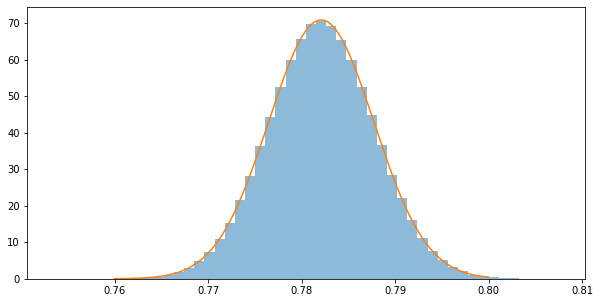

In [43]:
x = np.arange(0.76, 0.8, 0.0001)
plt.subplots(figsize=(10,5))
plt.hist(new_F, bins=50, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, F, tol_F))

## Monte-Carlo Part 2

In [45]:
mM1 = 40e4
sM1 = 2e4
mM2 = 30e4
sM2 = 10e4
mr = 3.2
sr = 1
G = 6.67384e-11

mF = G * mM1 * mM2 / mr ** 2
dfM1 = G * mM2 / mr ** 2
dfM2 = G * mM1 / mr ** 2
dfr = -2 * G * mM1 * mM2 / mr ** 3
sF = (dfM1**2 * sM1**2 + dfM2**2 * sM2**2 + dfr**2 * sr**2) ** .5 
print('F =', mF, '±', sF)

F = 0.7820906249999999 ± 0.5553593043410235


In [46]:
n = 10**6
np.random.seed(1)
M1 = np.random.normal(mM1, sM1, size=n)
M2 = np.random.normal(mM2, sM2, size=n)
r = np.random.normal(mr, sr, size=n)

F = G * M1 * M2 / r ** 2
print('F =', F.mean(), '±', F.std())

F = 979.9788519691705 ± 644287.8731926193


In [47]:
print(min(abs(F)), max(abs(F)), min(F))

1.0853010779573736e-05 599315863.9299655 -41.19830499821575


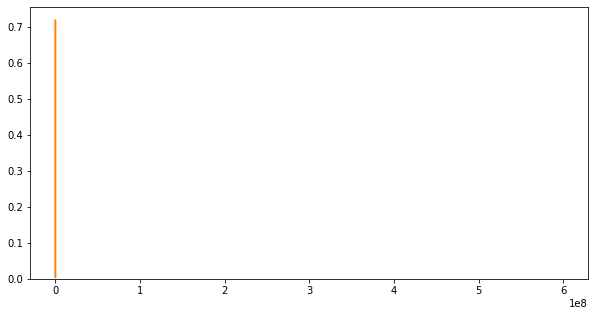

In [48]:
x = np.arange(-1, 2.5, .001)

plt.subplots(figsize=(10,5))
plt.hist(F, bins=100, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))

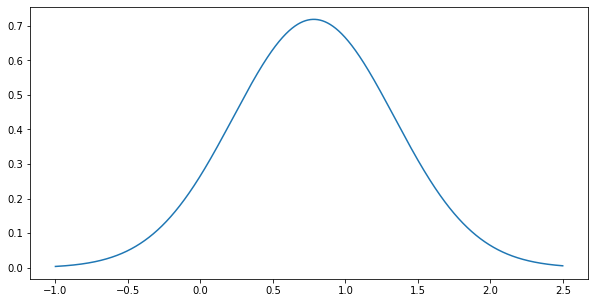

In [49]:
x = np.arange(-1, 2.5, .001)

plt.subplots(figsize=(10,5))
plt.plot(x, norm.pdf(x, mF, sF))

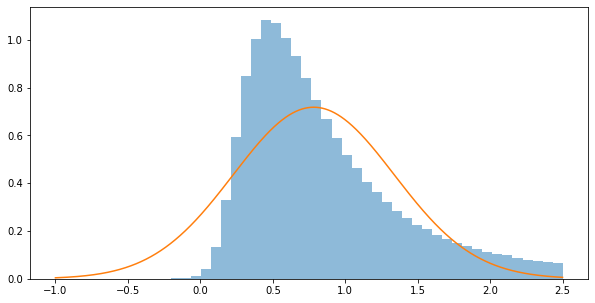

In [50]:
x = np.arange(-1, 2.5, 0.001)

plt.subplots(figsize=(10,5))
#if we exclude some of them
plt.hist(F[(F<2.5) & (F>-1)], bins=50, alpha=.5, density = True)
plt.plot(x, norm.pdf(x, mF, sF))
